## Pressure distribution on the Apollo Command Module

In the following notebook we are quickly going to check the pressure distribution on the Apollo Command Module computed with the modified Newtonian theory, and compare it with laboratory data.

For more information check:

* "Hypersonic Aerothermodynamics", Chapter 6, by John J. Bertin
* "The effect of protuberances, cavities and angle of attack on the wind-tunnel pressure and heat-transfer distribution for the Apollo Command Module", John J. Bertin

Note: the results will not be commented here. Refer to the above source to better understand the differences between computed results and lab-data.

### Apollo Command Module geometry

In [1]:
import matplotlib.pyplot as plt
import numpy as np

R1 = 4.694
R2 = 0.196
R3 = 0.39
Rb = 1.956
# half-angle of the conical section
theta1 = 33
# angle of the intersection between arc of radius R1 with
# arc of radius R2
theta2 = 23.045

A quick drawing to visualize the profile:

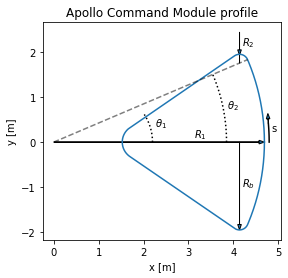

In [2]:
t = np.deg2rad(np.linspace(0, theta2, 100))
x1 = R1 * np.cos(t)
y1 = R1 * np.sin(t)
t = np.deg2rad(np.linspace(theta2, 90 + theta1, 100))
x2 = R2 * np.cos(t) + x1[-1] - R2 * np.cos(np.deg2rad(theta2))
y2 = R2 * np.sin(t) + y1[-1] - R2 * np.sin(np.deg2rad(theta2))
t = np.deg2rad(np.linspace(90 + theta1, 180, 100))
d = 1.91627
x3 = R3 * np.cos(t) + d
y3 = R3 * np.sin(t)

x = np.concatenate([x1, x2, x3])
x = np.concatenate([x, np.flip(x)])
y = np.concatenate([y1, y2, y3])
y = np.concatenate([y, -np.flip(y)])

plt.figure()
plt.plot(x, y)
plt.arrow(0, 0, R1 - 0.12, 0, width=0.0005, head_width=0.08)
plt.annotate("$R_{1}$", (2 * R1 / 3, 0.1))
plt.arrow(4.13937, 1.760, 0, R2, width=0.0005)
plt.arrow(4.13937, 1.760 + 3 * R2 + 0.1, 0, -2 * R2, width=0.0005, head_width=0.08)
plt.annotate("$R_{2}$", (4.13937 + 0.05, 1.760 + 2 * R2))
plt.arrow(4.13937, 0, 0, -Rb + 0.12, width=0.0005, head_width=0.08)
plt.annotate("$R_{b}$", (4.13937 + 0.05, -Rb / 2))

t = np.deg2rad(np.linspace(0, theta1))
x4 = 1.06934 + (2.2 - 1.06934) * np.cos(t)
y4 = (2.2 - 1.06934) * np.sin(t)
plt.plot(x4, y4, 'k:')
plt.annotate(r"$\theta_{1}$", (2.25, 0.35))
plt.plot([0, R1 * np.cos(np.deg2rad(theta2))], [0, R1 * np.sin(np.deg2rad(theta2))], 'k--', alpha=0.5)

t = np.deg2rad(np.linspace(0, theta2))
x5, y5 = 3.85 * np.cos(t), 3.85 * np.sin(t)
plt.plot(x5, y5, 'k:')
plt.annotate(r"$\theta_{2}$", (3.85, 0.75))

t = np.deg2rad(np.linspace(0, 5))
x6, y6 = 4.8 * np.cos(t), 4.8 * np.sin(t)
plt.plot(x6, y6, 'k')
plt.arrow(x6[-1], y6[-1], -0.005, 0.1, head_width=0.08)
plt.annotate("s", (4.85, 0.25))

plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.title("Apollo Command Module profile")
plt.axis('scaled')
plt.show()

Let's now compute the length $s$ and the associated local body angles $\theta_{b}$:

In [3]:
theta3 = 90 - theta2
# arc length of radius R1
sR1 = np.deg2rad(theta2) * R1
# total length up to the maximum body radius Rb
s = sR1 + np.deg2rad(theta3) * R2
# discretize the length
s_arr = np.linspace(0, s, 200)
# local body angle
theta_b = np.zeros_like(s_arr)
for i, v in enumerate(s_arr):
    if v <= sR1:
        theta_b[i] = np.pi / 2 - s_arr[i] / R1
    else:
        theta_b[i] = np.pi / 2 - ((s_arr[i] - sR1) / R2 + np.deg2rad(theta2))
s_arr = np.concatenate([np.flip(-s_arr), s_arr])
theta_b = np.concatenate([np.pi - np.flip(theta_b), theta_b])

Note:

* $s / R_{b} = 0.965$ defines the tangency point between the arc of radius $R_{1}$ and the arc of radius $R_{2}$.
* $s / R_{b} = 1.082$ corresponds to the maximum body radius $R_{b}$.

### 0deg angle of attack

The experimental data is given here. The first column represents $s / R_{B}$ while the second column is $p_{s} / p_{t2}$.

In [4]:
# free stream Mach number
Minf = 10.18

data_0deg = np.array([
    [-1.027237354085603, 0.1834808259587022],
    [-0.9478599221789883, 0.5775811209439529],
    [-0.7844357976653697, 0.8442477876106195],
    [-0.2334630350194553, 0.983480825958702],
    [0.03268482490272362, 0.9929203539823008],
    [0.2894941634241248, 0.966961651917404],
    [0.5649805447470819, 0.9244837758112094],
    [0.7003891050583655, 0.8418879056047198],
    [0.8357976653696495, 0.8135693215339233],
    [0.891828793774319, 0.7734513274336283],
    [0.943190661478599, 0.7097345132743362],
    [0.9992217898832685, 0.5256637168141592],
    [1.045914396887159, 0.17640117994100302],
    [1.0972762645914398, 0.018289085545722727]
])

Let's now compute the pressure distribution with a modified newtonian flow model:

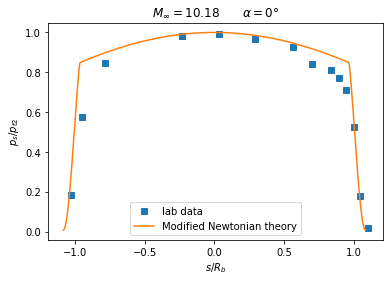

In [5]:
from pygasflow.newton import modified_newtonian_pressure_ratio
ps_pt2 = modified_newtonian_pressure_ratio(Minf, theta_b)

plt.figure()
plt.plot(data_0deg[:, 0], data_0deg[:, 1], 's', label="lab data")
plt.plot(s_arr / Rb, ps_pt2, label="Modified Newtonian theory")
plt.xlabel(r"$s / R_{b}$")
plt.ylabel(r"$p_{s} / p_{t2}$")
plt.title(r"$M_{\infty} = 10.18 \qquad \alpha = 0°$")
plt.legend()
plt.show()

### 33deg angle of attack

The experimental data is given here. The first column represents $s / R_{B}$ while the second column is $p_{s} / p_{t2}$.

In [6]:
data_33deg = np.array([
    [-1.0217821782178214, 0.06461538461538452],
    [-0.9623762376237623, 0.24615384615384595],
    [-0.7960396039603954, 0.36307692307692285],
    [-0.2554455445544548, 0.6030769230769228],
    [0.00594059405940639, 0.723076923076923],
    [0.27326732673267395, 0.8307692307692307],
    [0.5465346534653475, 0.9353846153846151],
    [0.6831683168316838, 0.9969230769230768],
    [0.8198019801980205, 1.006153846153846],
    [0.8613861386138622, 1.003076923076923],
    [0.9267326732673276, 0.9938461538461537],
    [0.9801980198019811, 0.9323076923076921],
    [1.0455445544554465, 0.6492307692307691],
    [1.0990099009901, 0.2338461538461536]
])

Let's now compute the pressure distribution with a modified newtonian flow model:

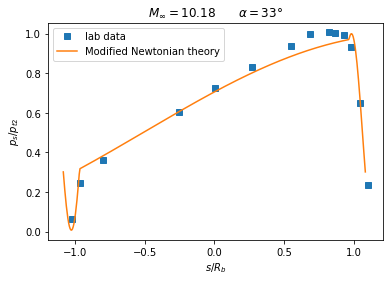

In [7]:
ps_pt2 = modified_newtonian_pressure_ratio(Minf, theta_b, alpha=np.deg2rad(33), beta=np.deg2rad(0))

plt.figure()
plt.plot(data_33deg[:, 0], data_33deg[:, 1], 's', label="lab data")
plt.plot(s_arr / Rb, ps_pt2, label="Modified Newtonian theory")
plt.xlabel(r"$s / R_{b}$")
plt.ylabel(r"$p_{s} / p_{t2}$")
plt.title(r"$M_{\infty} = 10.18 \qquad \alpha = 33°$")
plt.legend()
plt.show()